

---



---



---



**Aluno**: Henrique Meirelles Francisco

**Matrícula**: 4052025000604

**MVP Machine Learning**
Problema de **classificação** usando o dataset "Weather Type" (Tipo de Clima)

**Github**: https://github.com/HenriqueMFrancisco/puc-rio-Sprint-Machine-Learning



---



---



---




# ✅ Checklist do MVP (o que precisa conter)
- [x] **Problema definido** e contexto de negócio
- [x] **Carga e preparação** dos dados (sem vazamento de dados)
- [x] **Divisão** em treino/validação/teste (ou validação cruzada apropriada)
- [x] **Tratamento**: limpeza, transformação e **engenharia de atributos**
- [x] **Modelagem**: comparar abordagens/modelos (com **baseline**)
- [x] **Otimização de hiperparâmetros**
- [x] **Avaliação** com **métricas adequadas** e discussão de limitações
- [x] **Boas práticas**: seeds fixas, tempo de treino, recursos computacionais, documentação
- [ ] **Pipelines reprodutíveis** (sempre que possível)




---



---



---




# Definição do problema

**Objetivo do Projeto**

O objetivo principal deste projeto é desenvolver e avaliar modelos de **Classificação** em Machine Learning capazes de prever o "Weather Type" (Tipo de Clima) com base nas outras características meteorológicas e de localização fornecidas no dataset. Isso envolve:

1.  Realizar uma Análise Exploratória de Dados (EDA) para entender as características do dataset e as relações entre as variáveis.
2.  Preparar os dados para modelagem, incluindo a separação em conjuntos de treino e teste e a criação de folds para validação cruzada.
3.  Comparar o desempenho de diferentes algoritmos de classificação para identificar os modelos mais promissores.
4.  Otimizar os hiperparâmetros dos modelos selecionados para melhorar sua performance.
5.  Avaliar o modelo final usando métricas apropriadas e discutir suas limitações.

**Descrição dos Campos do Dataset**

Aqui está uma descrição dos campos (colunas) presentes no `weather_dataset`:

*   **Temperature (Temperatura):** A temperatura do ambiente em um determinado momento.
*   **Humidity (Umidade):** O nível de umidade no ar.
*   **Wind Speed (Velocidade do Vento):** A velocidade do vento.
*   **Precipitation (%) (Precipitação (%)):** O percentual de precipitação (chuva, neve, etc.).
*   **Cloud Cover (Cobertura de Nuvens):** O nível de cobertura do céu por nuvens.
*   **Atmospheric Pressure (Pressão Atmosférica):** A pressão atmosférica.
*   **UV Index (Índice UV):** O índice de radiação ultravioleta.
*   **Season (Estação):** A estação do ano (codificada numericamente).
*   **Visibility (km) (Visibilidade (km)):** A distância de visibilidade em quilômetros.
*   **Location (Localização):** O local onde os dados foram coletados (codificado numericamente).
*   **Weather Type (Tipo de Clima):** A variável alvo que representa o tipo de clima (codificada numericamente).


**Cloud Cover:**
clear = 0;
cloudy = 1;
partly cloudy = 2;
overcast = 3;

**Season**:
Autumn = 0;
Spring = 1;
Summer = 2;
Winter = 3;

**Location**:
coastal = 0;
inland = 1;
mountain = 2;

**Weather Type**
Cloudy = 0;
Rainy = 1;
Snowy = 2;
Sunny = 3;



# Importação das biblioteca necessária

In [66]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
# imports para feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
#Import para hipeparâmetros
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# Definindo uma seed global
np.random.seed(7)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Bibliotecas Importadadas")

Bibliotecas Importadadas


# Coleta dos dados - Carga do dataset

In [67]:
#Carga do dataset

#Dataset weather classification armazenado no  github
url_dados = 'https://raw.githubusercontent.com/HenriqueMFrancisco/puc-rio-Sprint-Machine-Learning/main/weatherDataset/weather_classification_data_NUM.csv'
#delimitador (;)
weather_dataset = pd.read_csv(url_dados, delimiter=';')




Based on the initial analysis, the `weather_dataset` contains 13200 rows and 11 columns.

The columns are:
- `Temperature`
- `Humidity`
- `Wind Speed`
- `Precipitation (%)`
- `Cloud Cover`
- `Atmospheric Pressure`
- `UV Index`
- `Season`
- `Visibility (km)`
- `Location`
- `Weather Type` (This is the target variable)

The dataset does not contain any missing values.

A brief statistical description of the numerical columns shows a range of values for each feature, indicating variability in temperature, humidity, wind speed, precipitation, atmospheric pressure, and visibility. The `UV Index`, `Season`, `Cloud Cover`, `Location`, and `Weather Type` columns appear to be categorical or encoded as numerical values.

In [68]:
print("Column information for weather_dataset:")
display(weather_dataset.info())

Column information for weather_dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


None

# Análise exploratória resumida (EDA)

## Verificações iniciais

In [69]:
# === Verificações iniciais ===
print("\nQuntidade de Linhas e Colunas do DataSet:")
display(weather_dataset.shape)
print("-------")
# Apresenta as primeiras linhas
print("Primeiras linhas:")
display(weather_dataset.head())
print("-------")
# Apresenta as últimas linhas
print("\nÚltimas linhas:")
display(weather_dataset.tail())
print("-------")
# Nome das Colunas do dataset
print("\nNome das Colunas do dataset")
display(weather_dataset.columns)
# Valores ausentes
print("\nValores ausentes por coluna:")
display(weather_dataset.isnull().sum())
# Estatística descritiva
print("\nEstatística descritiva:")
display(weather_dataset.describe())



Quntidade de Linhas e Colunas do DataSet:


(13200, 11)

-------
Primeiras linhas:


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,2,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,2,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,3,990.67,1,3,2.5,2,1


-------

Últimas linhas:


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,3,1003.15,1,2,1.0,2,1
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,2
13197,30.0,77,5.5,28.0,3,1012.69,3,0,9.0,0,0
13198,3.0,76,10.0,94.0,3,984.27,0,3,2.0,1,2
13199,-5.0,38,0.0,92.0,3,1015.37,5,0,10.0,2,1


-------

Nome das Colunas do dataset


Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')


Valores ausentes por coluna:


,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0



Estatística descritiva:


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,2.106136,1005.827896,4.005758,1.849394,5.462917,1.094091,1.500000
std,17.386327,20.194248,6.908704,31.946541,1.062781,37.199589,3.856600,1.164824,3.371499,0.791420,1.118076
min,-25.000000,20.000000,0.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,2.000000,994.800000,1.000000,1.000000,3.000000,0.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,2.000000,1007.650000,3.000000,2.000000,5.000000,1.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,3.000000,1016.772500,7.000000,3.000000,7.500000,2.000000,2.250000
max,109.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,3.000000,20.000000,2.000000,3.000000


## Histograma

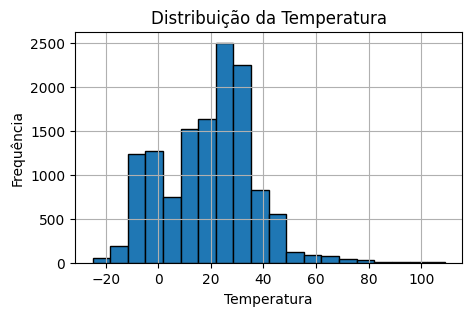

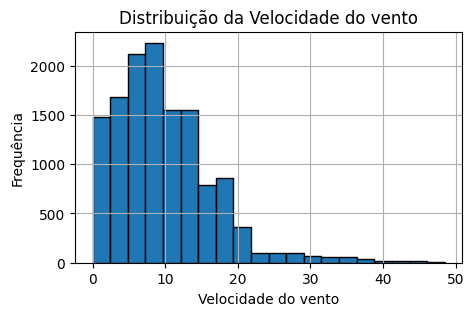

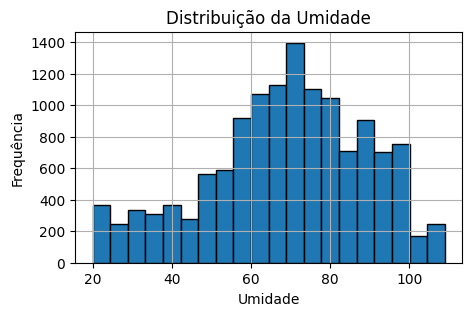

In [70]:
# Histograma da distribuição da variável 'Temperature'
plt.figure(figsize=(5, 3))
plt.hist(weather_dataset['Temperature'], bins=20, edgecolor='black')
plt.title('Distribuição da Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma da distribuição da variável 'Wind Speed'
plt.figure(figsize=(5, 3))
plt.hist(weather_dataset['Wind Speed'], bins=20, edgecolor='black')
plt.title('Distribuição da Velocidade do vento')
plt.xlabel('Velocidade do vento')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma da distribuição da variável 'Humidity'
plt.figure(figsize=(5, 3))
plt.hist(weather_dataset['Humidity'], bins=20, edgecolor='black')
plt.title('Distribuição da Umidade')
plt.xlabel('Umidade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## Heatmap da Matriz de Correlação

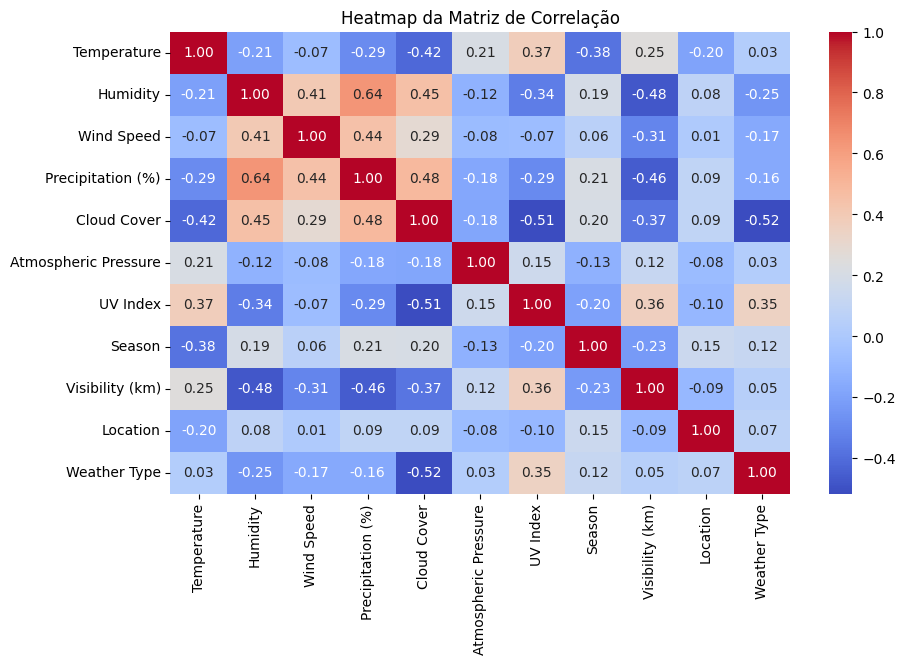

In [71]:
import seaborn as sns

# Calcular a matriz de correlação
correlation_matrix = weather_dataset.corr()

# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Matriz de Correlação')
plt.show()

# Preparação de Dados:  *Separação do dataset entre treino e tetes, folds para a validação cruzada*

In [72]:
# Preparar dados para o modelo
X = weather_dataset.drop('Weather Type', axis=1) # Features
y = weather_dataset['Weather Type'] # Target

#Features
print("Features (X):")
display(X.head())
print("------")
#Target
print("Target (y):")
display(y.head())
# faz a divisão -  Separação em bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print("------")
print("X_train.shape, X_test.shape, y_train.shape, y_test.shape")
X_train.shape, X_test.shape, y_train.shape, y_test.shape




Features (X):


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,2,1010.82,2,3,3.5,1
1,39.0,96,8.5,71.0,2,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0
4,27.0,74,17.0,66.0,3,990.67,1,3,2.5,2


------
Target (y):


,Weather Type
0,1
1,0
2,3
3,3
4,1


------
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((10560, 10), (2640, 10), (10560,), (2640,))

In [73]:
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds


# Feature Selection

## Regressão Logística

In [74]:

# Top 5 Atributos
# Feature Selection with RFE
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=5) # Select the top 5 features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

print("\nNomes dos 5 Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=weather_dataset.columns[0:10]))



Num Features: 5
Selected Features: [False False False False  True False  True  True  True  True]
Feature Ranking: [2 5 3 4 1 6 1 1 1 1]

Nomes dos 5 Atributos Selecionados: ['Cloud Cover' 'UV Index' 'Season' 'Visibility (km)' 'Location']


## Classificador ExtraTrees

In [75]:

#ExtraTrees
# Feature importance with Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=7)
model.fit(X_train, y_train)

# Print feature importances
print("Impotância de cada atributo:")
display(pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False))

Impotância de cada atributo:


,0
Precipitation (%),0.173940
Cloud Cover,0.146791
Temperature,0.138914
UV Index,0.130026
Season,0.100569
Visibility (km),0.099619
Atmospheric Pressure,0.069189
Humidity,0.066813
Wind Speed,0.037297
Location,0.036842


# Modelagem

## Avaliação do melhor algoritmo - Acurácia e F1_score

KNN - Accuracy: 0.888636 (0.008598) - F1-score: 0.888742 (0.008276)
CART - Accuracy: 0.906250 (0.008586) - F1-score: 0.907691 (0.008317)
NB - Accuracy: 0.867330 (0.009018) - F1-score: 0.867255 (0.008429)
SVM - Accuracy: 0.827083 (0.014313) - F1-score: 0.826573 (0.013724)


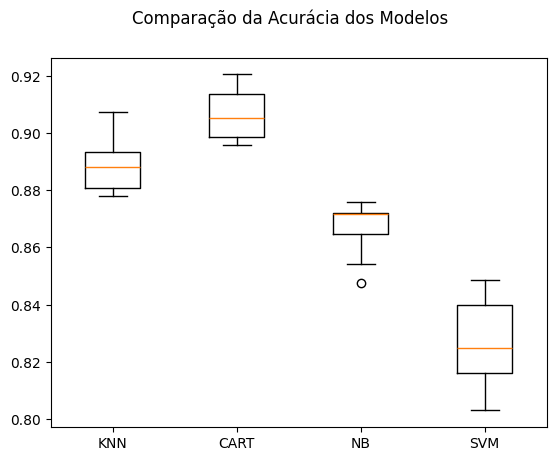

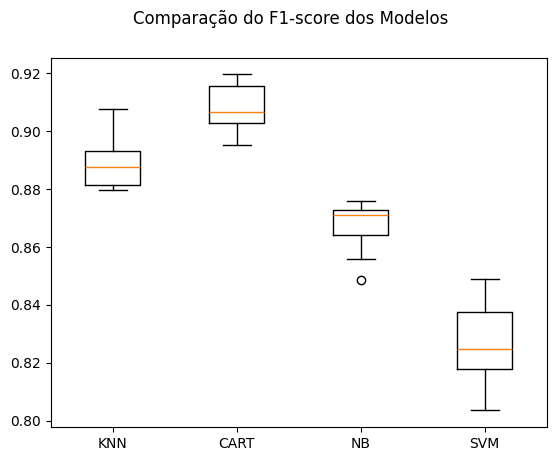

In [76]:
# Modelagem
# Listas para armazenar os modelos, os resultados de acurácia, resultados de F1-score e os nomes dos modelos
models = []
accuracy_results = []
f1_results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  # Avaliação para Acuracia
  cv_accuracy_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  accuracy_results.append(cv_accuracy_results)

  # Avaliação par F1-score ('f1_macro' para classificação multi-class)
  cv_f1_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')
  f1_results.append(cv_f1_results)

  # média e desvio padrão dos 10 resultados da validação cruzada
  names.append(name)
  msg = "%s - Accuracy: %f (%f) - F1-score: %f (%f)" % (name, cv_accuracy_results.mean(), cv_accuracy_results.std(), cv_f1_results.mean(), cv_f1_results.std())
  print(msg)

# Boxplot de comparação da Acurácia dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(accuracy_results)
ax.set_xticklabels(names)
plt.show()

# Boxplot de comparação do F1-score dos modelos
fig = plt.figure()
fig.suptitle('Comparação do F1-score dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(f1_results)
ax.set_xticklabels(names)
plt.show()

F1-Score foi ligeriamente melhor que a acurácia.

## Otimização de Hiperparâmetros

In [77]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=7),
                           param_grid=param_grid,
                           cv=kfold,  # Use the previously defined kfold for cross-validation
                           scoring='f1_macro',
                           n_jobs=-1) # Use all available cores

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Melhores parâmetros encontrados:")
display(grid_search.best_params_)
print("\nMelhor f1-score durante a validação cruzada:")
display(grid_search.best_score_)

Melhores parâmetros encontrados:


{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}


Melhor f1-score durante a validação cruzada:


np.float64(0.9088185713448464)

## Criando Modelo com todo conjunto de treino

In [78]:
# Criando um modelo com todo o conjunto de treino
# Modelo CART
model = DecisionTreeClassifier()
model.set_params(**grid_search.best_params_)
display(model.get_params())
# Treinando o modelo
model.fit(X_train, y_train)
# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)
# Estimando o f1-score no conjunto de teste
print("F1-score do Modelo CART: " )
display(f1_score(y_test, predictions, average='macro'))

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

F1-score do Modelo CART: 


0.9076026271086755

# Resumo e Conclusões Finais

Este projeto teve como objetivo desenvolver um modelo de Machine Learning para prever o "Weather Type" (Tipo de Clima) utilizando o dataset fornecido. As principais etapas realizadas foram:

1.  **Carga e Preparação dos Dados:** O dataset foi carregado e verificado quanto a valores ausentes, que não foram encontrados. A separação entre conjuntos de treino e teste foi realizada, bem como a configuração dos folds para validação cruzada.
2.  **Análise Exploratória de Dados (EDA):** Foram realizadas verificações iniciais, histogramas para visualizar a distribuição de algumas variáveis e um heatmap da matriz de correlação para entender as relações entre os atributos.
3.  **Feature Selection:** Foram utilizadas duas técnicas para identificar as características mais relevantes: RFE com Regressão Logística e Importância de Atributos com Extra Trees Classifier. Ambas as técnicas forneceram insights sobre a importância das variáveis.
4.  **Modelagem e Avaliação de Algoritmos:** Diferentes algoritmos de classificação (KNN, CART, NB, SVM) foram avaliados utilizando validação cruzada com métricas de acurácia e F1-score. A Árvore de Classificação (CART) apresentou o melhor desempenho inicial.
5.  **Otimização de Hiperparâmetros:** Os hiperparâmetros da Árvore de Classificação foram otimizados utilizando GridSearchCV para melhorar ainda mais a performance do modelo. Os melhores parâmetros foram identificados com base no F1-score macro.
6.  **Avaliação do Modelo Final:** Um modelo Árvore de Classificação com os hiperparâmetros otimizados foi treinado no conjunto de treino completo e avaliado no conjunto de teste, alcançando um F1-score macro de aproximadamente 0.91.

**Conclusões:**

*   O dataset não apresentou valores ausentes, o que facilitou a etapa de preparação dos dados.
*   A análise de correlação e a importância dos atributos destacaram a relevância de variáveis como `Precipitation (%)`, `Cloud Cover`, `Temperature` e `UV Index` na previsão do tipo de clima.
*   Entre os modelos avaliados, a Árvore de Classificação demonstrou ser a mais eficaz para este problema, com um desempenho notável após a otimização de hiperparâmetros.
*   O modelo final alcançou um bom F1-score no conjunto de teste, indicando sua capacidade de generalização para dados não vistos.

Este projeto demonstra um fluxo de trabalho típico em Machine Learning, desde a compreensão do problema e dos dados até a seleção, otimização e avaliação de modelos. Futuros trabalhos poderiam explorar outras técnicas de feature engineering, modelos mais complexos ou a análise do impacto das diferentes localizações na previsão do clima.